# Notebook ICD - 9

importamos librerias

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

## Conjunto de Datos de Diabetes - Indios Pima
Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de manera diagnóstica si un paciente tiene diabetes, basado en ciertas mediciones diagnósticas incluidas en el conjunto de datos. Se aplicaron varias restricciones para la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de edad y de ascendencia indígena Pima.


In [8]:
df = pd.read_csv("diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [10]:

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [12]:
# if necessary
replace_dict = {'yes': '1', 'no': '0'}
y2 = y.replace(replace_dict)

In [14]:
df2 = df.replace(replace_dict)
print(df2.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Métodos de filtro
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection

InfoGain
Estima la información mutua para una variable objetivo discreta.

La información mutua (MI) entre dos variables aleatorias es un valor no negativo que mide la dependencia entre las variables. Es igual a cero si, y solo si, las dos variables aleatorias son independientes; valores más altos indican mayor dependencia.

La función se basa en métodos no paramétricos de estimación de entropía utilizando distancias de los k-vecinos más cercanos.

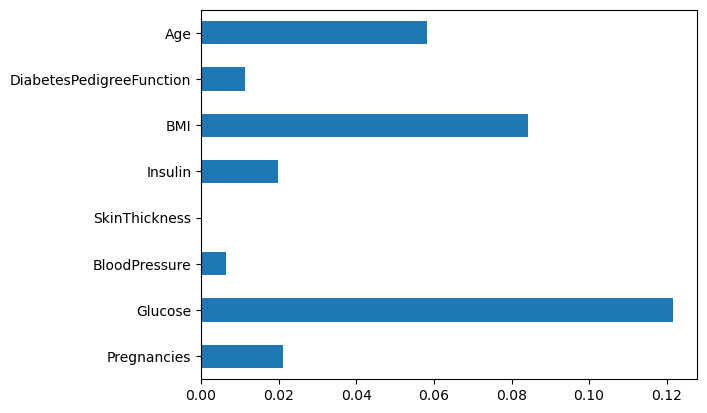

Execution time: 0.03 seconds


In [17]:
from sklearn.feature_selection import mutual_info_classif

# start time
start_time_forward = time.time()

### Applying feature selection method
X_new = mutual_info_classif(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# plot feature selection
feat_imp = pd.Series(X_new, df.columns[0:len(df.columns)-1])
feat_imp.plot(kind='barh')
plt.show()

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")


## Varianza baja
VarianceThreshold es un enfoque simple de referencia para la selección de características. Elimina todas las características cuya varianza no alcanza un cierto umbral. Por defecto, elimina todas las características con varianza cero, es decir, aquellas que tienen el mismo valor en todas las muestras.

Como ejemplo, supongamos que tenemos un conjunto de datos con características booleanas y queremos eliminar todas las características que son uno o cero (activadas o desactivadas) en más del 80% de las muestras. Las características booleanas son variables aleatorias de tipo Bernoulli, y la varianza de tales variables se da por: Var[X] = p(1-p), por lo que podemos seleccionar usando el umbral 0.8 * (1 - 0.8), u otro...


In [21]:
from sklearn.feature_selection import VarianceThreshold

# start time
start_time_forward = time.time()

### Applying feature selection method
sel = VarianceThreshold(threshold=0.16)
sel.fit_transform(X)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = sel.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
Execution time: 0.00 seconds



## Selección de características univariada
La selección de características univariada funciona seleccionando las mejores características basadas en pruebas estadísticas univariadas. Puede considerarse como un paso de preprocesamiento para un estimador. Scikit-learn expone rutinas de selección de características como objetos que implementan el método transform:

SelectKBest elimina todas las características excepto las k con las puntuaciones más altas.
SelectPercentile elimina todas las características excepto un porcentaje, especificado por el usuario, de las características con las puntuaciones más altas.
Estos métodos utilizan pruebas estadísticas univariadas comunes para cada característica:

SelectFpr (tasa de falsos positivos),
SelectFdr (tasa de descubrimiento falso), o
SelectFwe (error de tipo I familiar).
GenericUnivariateSelect permite realizar una selección de características univariada con una estrategia configurable, lo cual permite seleccionar la mejor estrategia de selección univariada con un estimador de búsqueda de hiperparámetros.

Por ejemplo, podemos usar una prueba F para obtener las dos mejores características de un conjunto de datos de la siguiente manera:

In [24]:

from sklearn.feature_selection import SelectKBest, f_classif

# start time
start_time_forward = time.time()

### Applying feature selection method
select_kbest = SelectKBest(score_func=f_classif, k=5)  # change k
select_kbest.fit_transform(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = select_kbest.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Execution time: 0.00 seconds



## Chi2
Calcula las estadísticas de chi-cuadrado entre cada característica no negativa y la clase.

Este puntaje puede usarse para seleccionar las n_features con los valores más altos para la estadística de prueba chi-cuadrado a partir de X, que debe contener solo características no negativas, como valores booleanos o frecuencias (por ejemplo, conteo de términos en clasificación de documentos), en relación con las clases.

Recuerda que la prueba chi-cuadrado mide la dependencia entre variables estocásticas; por lo tanto, el uso de esta función "elimina" las características que tienen mayor probabilidad de ser independientes de la clase y, por ende, irrelevantes para la clasificación.

In [27]:

from sklearn.feature_selection import SelectKBest, chi2

# start time
start_time_forward = time.time()

### Applying feature selection method
chi2_selector = SelectKBest(score_func=chi2, k=5)  # change k
chi2_selector.fit_transform(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = chi2_selector.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']
Execution time: 0.01 seconds


## Coeficiente de correlación
La correlación es una medida de la relación lineal entre dos o más variables. A través de la correlación, podemos predecir una variable a partir de otra. La lógica detrás del uso de la correlación para la selección de características es que las buenas variables tienen una alta correlación con el objetivo. Además, las variables deben estar correlacionadas con el objetivo, pero no entre sí.

Si dos variables están correlacionadas, podemos predecir una a partir de la otra. Por lo tanto, si dos características están correlacionadas, el modelo solo necesita una, ya que la segunda no aporta información adicional. Usaremos la correlación de Pearson aquí.

<Axes: >

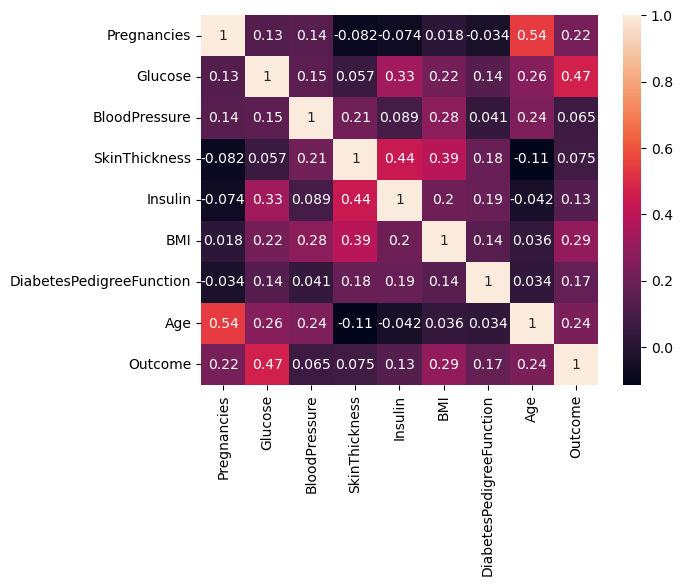

In [30]:
cor = df2.corr()
sns.heatmap(cor, annot = True)

In [32]:

# start time
start_time_forward = time.time()

### Applying feature selection method
correlation_matrix = df2.corr()
corr_with_target = correlation_matrix["Outcome"].drop("Outcome")

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# Sort and show features by absolute correlation value
sorted_corr = corr_with_target.abs().sort_values(ascending=False)
print(f"Absolute Correlations with the Objective (Outcome):\n{sorted_corr}")

# Define a threshold for correlation (e.g., keep features with |correlation| > 0.2)
threshold = 0.2
selected_features_corr = sorted_corr[sorted_corr > threshold].index.tolist()
print(f"Selected features are: {selected_features_corr}")

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

Absolute Correlations with the Objective (Outcome):
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64
Selected features are: ['Glucose', 'BMI', 'Age', 'Pregnancies']
Execution time: 0.00 seconds


## **Selección hacia adelante**  
Los algoritmos de selección secuencial de características son una familia de algoritmos de búsqueda voraces que se utilizan para reducir un espacio inicial de características de dimensión *d* a un subespacio de características de dimensión *k*, donde *k < d*. La motivación detrás de estos algoritmos de selección de características es seleccionar automáticamente un subconjunto de características más relevantes para el problema. El objetivo de la selección de características es doble: mejorar la eficiencia computacional y reducir el error de generalización del modelo eliminando características irrelevantes o ruido.

Este es un método iterativo en el cual se comienza evaluando las características en relación con el objetivo. Luego, se selecciona otra variable que ofrezca el mejor rendimiento en combinación con la primera característica seleccionada. Este proceso continúa hasta que se cumple el criterio preestablecido.

In [35]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [37]:

# start time
start_time_forward = time.time()

### Applying feature selection method
ffs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='forward')
ffs.fit(X, y2)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = ffs.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
Execution time: 0.21 seconds


## Eliminación hacia atrás
Este método funciona exactamente al contrario del método de Selección de Características Hacia Adelante. Aquí, comenzamos con todas las características disponibles y construimos un modelo. Luego, eliminamos del modelo la variable que da el mejor valor en la medida de evaluación. Este proceso continúa hasta que se cumple el criterio preestablecido.

In [40]:
# start time
start_time_forward = time.time()

### Applying feature selection method
bfs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='backward')
bfs.fit(X, y2)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = bfs.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
Execution time: 0.23 seconds


## **Selección exhaustiva de características**  
Este algoritmo de selección exhaustiva de características es un enfoque *wrapper* que evalúa de manera exhaustiva todos los subconjuntos posibles de características. El mejor subconjunto se selecciona optimizando una métrica de rendimiento especificada, utilizando un regresor o clasificador arbitrario.

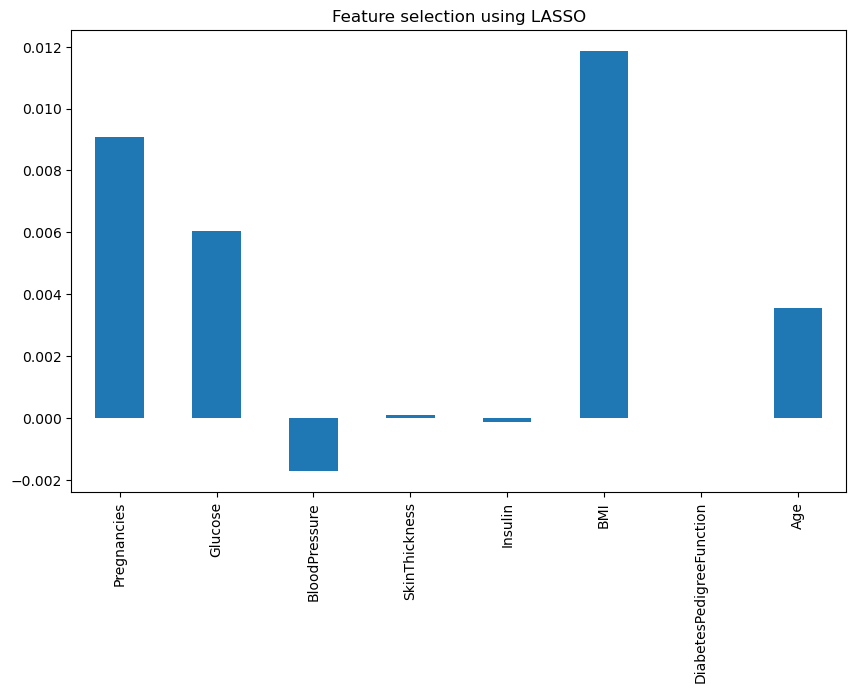

Execution time: 0.00 seconds


In [45]:
from sklearn.linear_model import Lasso

# start time
start_time_forward = time.time()

### Applying feature selection method
lasso = Lasso(alpha=0.1)  # adjust alpha
lasso.fit(X, y2)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

plt.figure(figsize=(10, 6))
lasso_coef.plot(kind='bar')
plt.title('Feature selection using LASSO')
plt.show()

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

## Random Forest Importance

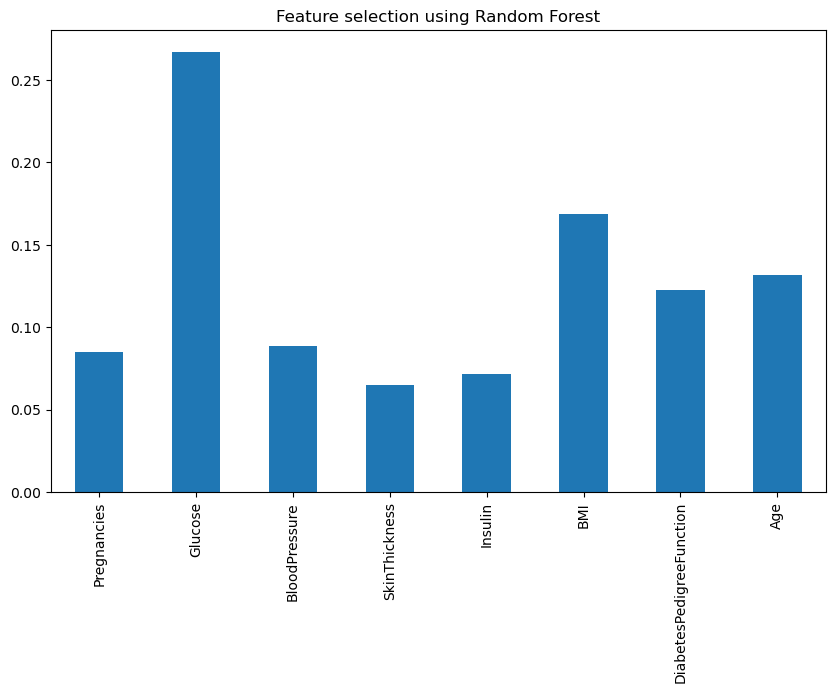

Execution time: 0.00 seconds


In [48]:
from sklearn.ensemble import RandomForestClassifier

# start time
start_time_forward = time.time()

### Applying feature selection method
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# show feature selection
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10, 6))
forest_importances.plot(kind='bar')
plt.title('Feature selection using Random Forest')
plt.show()

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")
